In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Statistical Learning</center></h1>

### 2.1 What Is Statistical Learning?

The <b>Advertising</b> data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: <b>TV, radio, and newspaper.</b> The plot of data is shown below. Our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.

In general, suppose that we observe a quantitative response $Y$ and $p$ different predictors, $X_1$, $X_2$, ... , $X_p$, we assume that there is some relationship between $Y$ and $X = (X_1, X_2, ... , X_p)$, which can be written in general form as:

$$Y = f(X) + \epsilon$$

where, $\epsilon$ is a random error term which is independent of X and has mean 0. In this formula, $f$ represents the systematic information that $X$ provides about $Y$. <b>In essence, statistical learning refers to a set of approaches for estimating  $f$.</b>

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


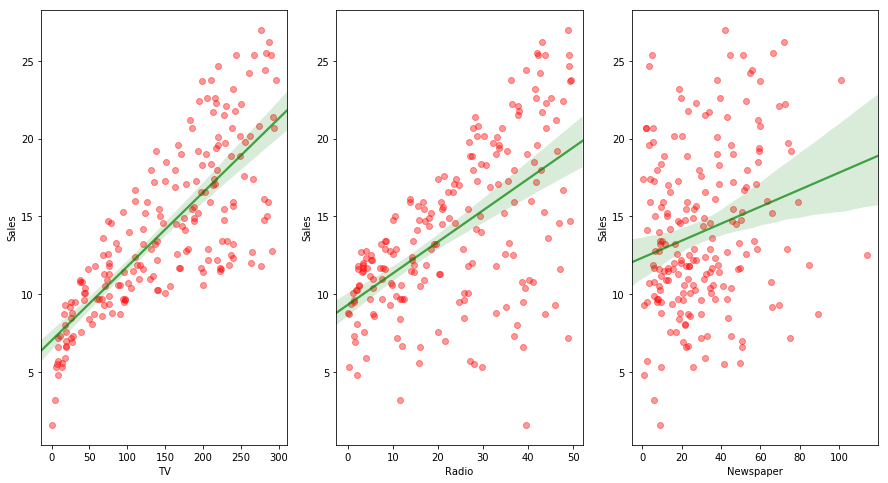

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

adv = pd.read_csv("data/Advertising.csv")

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(131)
sns.regplot(x="TV", y="Sales", color='r', data=adv, order=1, scatter_kws={'alpha':0.4}, 
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax = fig.add_subplot(132)
sns.regplot(x="Radio", y="Sales", color='r', data=adv, order=1, scatter_kws={'alpha':0.4}, 
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('Radio')
ax.set_ylabel('Sales')

ax = fig.add_subplot(133)
sns.regplot(x="Newspaper", y="Sales", color='r', data=adv, order=1, scatter_kws={'alpha':0.4}, 
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('Newspaper')
ax.set_ylabel('Sales')

plt.show()

#### 2.1.1 Why Estimate f ?

There are two main reasons that we may wish to estimate $f$:
 - <b>Prediction:</b> We can predict $Y$ using $X$ as:
 
 $$\widehat{Y} = \widehat{f}(X)$$
 
 where $\widehat{f}$ represents our estimate for $f$ and $\widehat{Y}$ represents the resulting prediction for $Y$. The accuracy of $\widehat{Y}$ as a prediction of $Y$ depends on two quantities: <b>reducible error</b> and <b>irreducible error</b>. Reducible error can be minimized by opting a better prediction. Irreducible error arises due to $Y$'s dependence on $\epsilon$ and hence can not be reduced further. 
 
 
 - <b>Inference:</b> In this situation we wish to estimate $f$, but our goal is not necessarily to make predictions for $Y$. Instead, we want to understand the relationship between $X$ and $Y$, or more specifically, we want to understand how $Y$ changes as a function of $X$. The three main questions that can be of interest while doing inference analysis are: <b>Which predictors are associated with the response?, What is the relationship (positive or negative) between the response and each predictor?</b> and <b>Can the relationship between Y and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?</b

#### 2.1.2 How Do We Estimate f ?

$f$ can be estimated by many <b>linear</b> and <b>non-linear</b> approaches. The given dataset is called as <b>training data</b>. Our goal is to apply a statistical learning method to the training data in order to estimate $f$. In other words, we want to find a function $\widehat{f}$ such that $Y \approx \widehat{f}(X)$ for an observation $(X,Y)$. The most statistical learning methods for this task can be characterized as:
 - <b>Parametric Methods:</b> Parametric methods involve a two-step model based approach which are:
    - We make an assumption about the shape of $f$. For a liner model,  $f$ can be represented as:
    
    $$f(X) = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p$$
    
    and then we have to estimate $p+1$ coefficients $\beta_0, \beta_1,..., \beta_p$.
    
    - After the model has been selected, we need a procedure that uses the <b>training data</b> to estimate the parameters.
    
    The model based approach described above is called as <b>parametric</b>, as it reduces the problem of estimating $f$ down to the estimation of a set of parameters. Parametric form is easy to estimate but with a disadvantage that the chosen model will not match the true unknown form of $f$. We can design more complex models to overcome this issue but this leads to <b>overfitting</b> the data as it follows the <b>error</b> or <b>noise</b> too closely.
    
    
 - <b>Non-parametric Methods:</b> Non-parametric methods seek an estimate of $f$ that gets as close to the data points as possible without being too rough or wiggly. They have the potential to accurately fit a wider range of possible shapes of $f$. Since they do not reduce the problem of estimating $f$ to a small number of parameters, a very large number of observations is required to obtain an accurate estimate of $f$.

#### 2.1.3 The Trade-Off Between Prediction Accuracy and Model Interpretability

A common question related to model selection is: <b>why would we ever choose to use a more restrictive method instead of a very flexible approach?</b> When inference is the goal, linear model (restrictive) is a good choice as it is easy to interpret. So we can conclude that when inference is the goal, simple and relatively inflexible statistical learning methods have a clear advantage. For prediction, a more flexible and complex model can be used as interpretability is not a concern.

#### 2.1.4 Supervised Versus Unsupervised Learning

In supervised learning, for each observation of the predictor measurement, there is an associated response measurement which is used to build a model and predict the response of future observations.

In unsupervised learning, there is no response associated with the observations. Cluster analysis is an example of unsupervised learning.

#### 2.1.5 Regression Versus Classification Problems

Variables can be characterized as either <b>quantitative</b> or <b>qualitative (categorical)</b>. Quantitative variables take on numerical values, whereas, qualitative variables take on values in one of the $K$ different classes. We refer to problems with a quantitative response as <b>regression</b> problem, while those involving a qualitative response is called as <b>classification</b> problem. The type of <b>predictors</b> is not of much concern when choosing the model as categorical variables can easily be coded before applying the model.

### 2.2 Assessing Model Accuracy

No one statistical learning method dominates all other over all possible data sets. Hence it is an important task to decide that for any given data set which model fits best.

#### 2.2.1 Measuring the Quality of Fit

In the <b>regression</b> setting, the most commonly used measure for quality of fit is <b>mean squared error (MSE)</b>, which is given as:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{f}(x_i))^{2}$$

where $\widehat{f}(x_i)$ is the prediction for the $i$th observation. MSE will be small if the predicted responses are very close to the true responses. While training a model, <b>training MSE</b> is of lesser significance. We should be more interested in <b>test MSE</b>, which is the MSE for the previously unseen test observation not used to train the model. When the test data is available, we can simply compute test MSE and select the model which has the lowest test MSE. In the absence of test data, the basic approach is to simply select a model with the lowest training MSE. Below figure shows the MSE of test and train data for a model.

<img src="images/MSE.PNG"  width="1200px">

In the right image, the grey curve shows training MSE and the red one test MSE. The <b>horizontal dashed line</b> indicates $Var(\epsilon)$, which is the lowest achievable test MSE amongst all methods. It is to be noted that as we increase <b>flexibility (degree of freedom)</b>, training MSE reduces but test MSE tends to increase after a certain point. So the blue curve on the left, which, although has a higher training MSE is the bset fit for the data.

The right hand side figure shows a fundamental property of a statistical model irrespective of the data set or the statistical methods being used. When a small method yields a small training MSE but a large test MSE, we are <b>overfitting</b> the data.

There are various approaches that can be used to find the best model (or find the minimum point) by analysing test MSE. One important method is <b>cross-validation</b>, which is a method for estimating test MSE using the training data.

#### 2.2.2 The Bias-Variance Trade-Off

The expected test MSE for a given value $x_0$ can always be decomposed into the sum of three fundamental quantities: <b>variance of $\widehat{f}(x_0)$</b>, <b>the squared bias of $\widehat{f}(x_0)$</b> and the variance of the <b>error term $\epsilon$</b>.

$$E(y_0 - \widehat{f}(x_0))^{2} = Var(\widehat{f}(x_0)) + [Bias(\widehat{f}(x_0))]^{2} + Var(\epsilon)$$

Here the notion $E(y_0 - \widehat{f}(x_0))^{2}$ defines the <b>expected test MSE</b> and refers to the average test MSE that would be obtained if we repeatedly estimated $f$ using a large number of training sets ane tested each at $x_0$. The overall expected test MSE can be computed by averaging it over all possible values of $x_0$ in the test set.

In order to minimize the expected test error, we need to select a statistical learning method that simultaneously achieves <b>low variance</b> and <b>low bias</b>.

<b>Variance</b> refers to the amount by which $\widehat{f}$ would change if we estimated it using a different training data. If a statistical method ($\widehat{f})$ has high variance, small change in the training data can result in a largr change in $\widehat{f}$. <b>More flexible statistical methods have higher variance.</b>

<b>Bias</b> refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model. Generally, <b>more flexible methods result in less bias.</b>

As we use more flixible methods, <b>variance will increase and bias will decrease.</b> As we increase the flexibility of a statistical method, <b>the bias tends to initially decrease faster than the variance increases,</b> and hence the test MSE declines. Below figure illustrates the bias-variance tradeoff (with increasing flexibility) for the example shown above. Blue curve represents the squared bias, orange curve the variance and red curve the test MSE. It should be noted that as we increase the flexibility, bias decreases and variance increases. This phenomenon is referred to as <b>bias-variance tradeoff</b>, as it is easy to obtain a method with extremely low bias but high variance or a method with very low variance but high bias.

<img src="images/Bias Variance Tradeoff.png"  width="400px">

#### 2.2.3 The Classification Setting

The most common approach for quantifying the accuracy of the estimate $\widehat{f}$ in the classification setting is the <b>training error rate</b>, defined as the proportion of mistakes that are made if we apply our estimate $\widehat{f}$ to the training observations:

$$\frac{1}{n}\sum_{i=1}^{n} I(y_i \neq \widehat{y_i})$$

where $\widehat{y_i}$ is the predicted class label for the $i$th observation and $I(y_i \neq \widehat{y_i})$ is the <b>indicator variable</b> that equals 1 if $y_i \neq \widehat{y_i}$. Hence, <b>the above equation computes the fraction of incorrect classifications.</b> Similarly, the <b>test error rate</b> associated with the test observations of the form $(x_0, y_0)$ can be calculated as:

$$Ave(I(y_0 \neq \widehat{y_0}))$$

#### The Bayes Classifier

In the classification setting, the test error rate can be minimized on an average by a simple classifier that <b>assign each observations to the most likely class, given its predictor values.</b> We can simply assign a test observation with predictor value $x_0$ to the class $j$ for which

$$Pr(Y=j \ | \  X = x_0)$$

is largest. This classifier is called as <b>Bayes Classifier.</b> In a two class classifier, Bayes classifier predicts the class <b>1</b>, if $Pr(Y=1 \ | \  X = x_0) > 0.5$, and class <b>2</b> otherwise. The boundary that divides the data set into classes (when probability of being in different classes is equal) is called as the <b>Bayes decision boundary</b>.

The Bayes classifier produces the lowest possible test error rate called as the <b>Bayes error rate.</b> Since the bayes classifier will always choose the class for which the probability is maximum, the error rate at $X=x_0$ will be $1 - max_{j}Pr(Y=j \ | \ X=x_0)$. Hence, overall bayes error rate is given as:

$$1 - E(max_{j}Pr(Y=j \ | \ X=x_0)),$$

where exception averages the probability over all possible values in $X$.

#### K-Nearest Neighbors

For real data, we do not know the conditional distribution of Y given X and hence computing Bayes Classifier is impossible. Many approaches attempt to estimate the <b>conditional distribution of Y given X</b> and then classify a given observation to the calss with highest estimated probability. One such method is called the <b>K-nearest neighbors (KNN) classifier</b>.

Given a positive integer <b>K</b> and a test observation $x_0$, the KNN classifier first identifies the $K$ points in the training data that are closest to $x_0$, represented by $N_0$. It then estimates the conditional probability of class $j$ as the fraction of points in $N_0$ whose response values equal $j$:

$$Pr(Y = j \ | \ X = x_0) = \frac{1}{K} \sum_{i \in N_0}I(y_i = j)$$

Finally, KNN applies Bayes rule and classifies the test observation $x_0$ to the class with the largest probability.

Despite the fact that it is a very simple approach, KNN can often produce classifiers that are surprisingly close to the optimal Bayes classifier. <b>Choice of K has a drastic effect on KNN classifier.</b> Below figure shows the effect of K on <b>KNN decision boundary</b>. When <b>K=1</b>, KNN classifier is highly flexible and find patterns in the data that don't correspond to the Bayes decision boundary. Hence, <b>lower value of K corresponds to a classifier that has low bias but very high variance.</b> As K grows, the method becomes less flexible and produces a decision boundary that is close to linear. <b>Higher value of K corresponds to a low-variance but high-bias classifier.</b> For KNN, <b>1\K</b> serves as a measure of flexibility. As K decreases, 1\K increases and hence flexibility increases.

<img src="images/KNN.png"  width="1200px">

<b>In both the regression and classification settings, choosing the correct level of flexibility is critical to the success of any statistical learning method. The bias-variance tradeoff, and the resulting U-shape in the test error, can make this a difficult task.</b>

### 2.4 Exercises

#### Conceptual

<b>Q1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer. </b>

(a) The sample size n is extremely large, and the number of predic- tors p is small.

<b>Sol:</b> Better

(b) The number of predictors p is extremely large, and the number of observations n is small.

<b>Sol:</b> Worse

(c) The relationship between the predictors and response is highly non-linear.

<b>Sol:</b> Better

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

<b>Sol:</b> Worse, as flixible model will try to fit the error term too.


<b>Q2. Explain whether each scenario is a classification or regression prob- lem, and indicate whether we are most interested in inference or pre- diction. Finally, provide n and p.</b>

(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

<b>Sol:</b> Regression and Inference; n=500, p=3

(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

<b>Sol:</b> Classification and Prediction; n=20, p=13

(c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

<b>Sol:</b> Regression and Prediction; n=Weeks in a year, p=3

<b>Q7. The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.</b>

<img src="images/2_7.png"  width="400px;">
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.

<b>Sol:</b> The Euclidean distance between the test point and the observations is as follows:

{Obs 1: 3, Obs 2: 2, Obs 3: $\sqrt{10}$, Obs 4: $\sqrt{5}$, Obs 5: $\sqrt{2}$, Obs 6: $\sqrt{3}$}

(b) What is our prediction with K = 1? Why?

<b>Sol:</b> The prediction with K=1 is the class of the nearest point which is <b>Green</b>.

(c) What is our prediction with K = 3? Why?

<b>Sol:</b> The three nearest points are : Observations 5,6 and 2 with their classes as Green, Red and Red and hence the prediction will be <b>Red</b>.

(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

<b>Sol:</b> For highly non-linear Bayes decision boundary, the value of K will be small.

#### Applied 

<b>Q8. This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US.</b>

In [3]:
import pandas as pd

college = pd.read_csv("data/College.csv")
college.set_index('Unnamed: 0', drop=True, inplace=True)
college.index.names = ['Name']
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


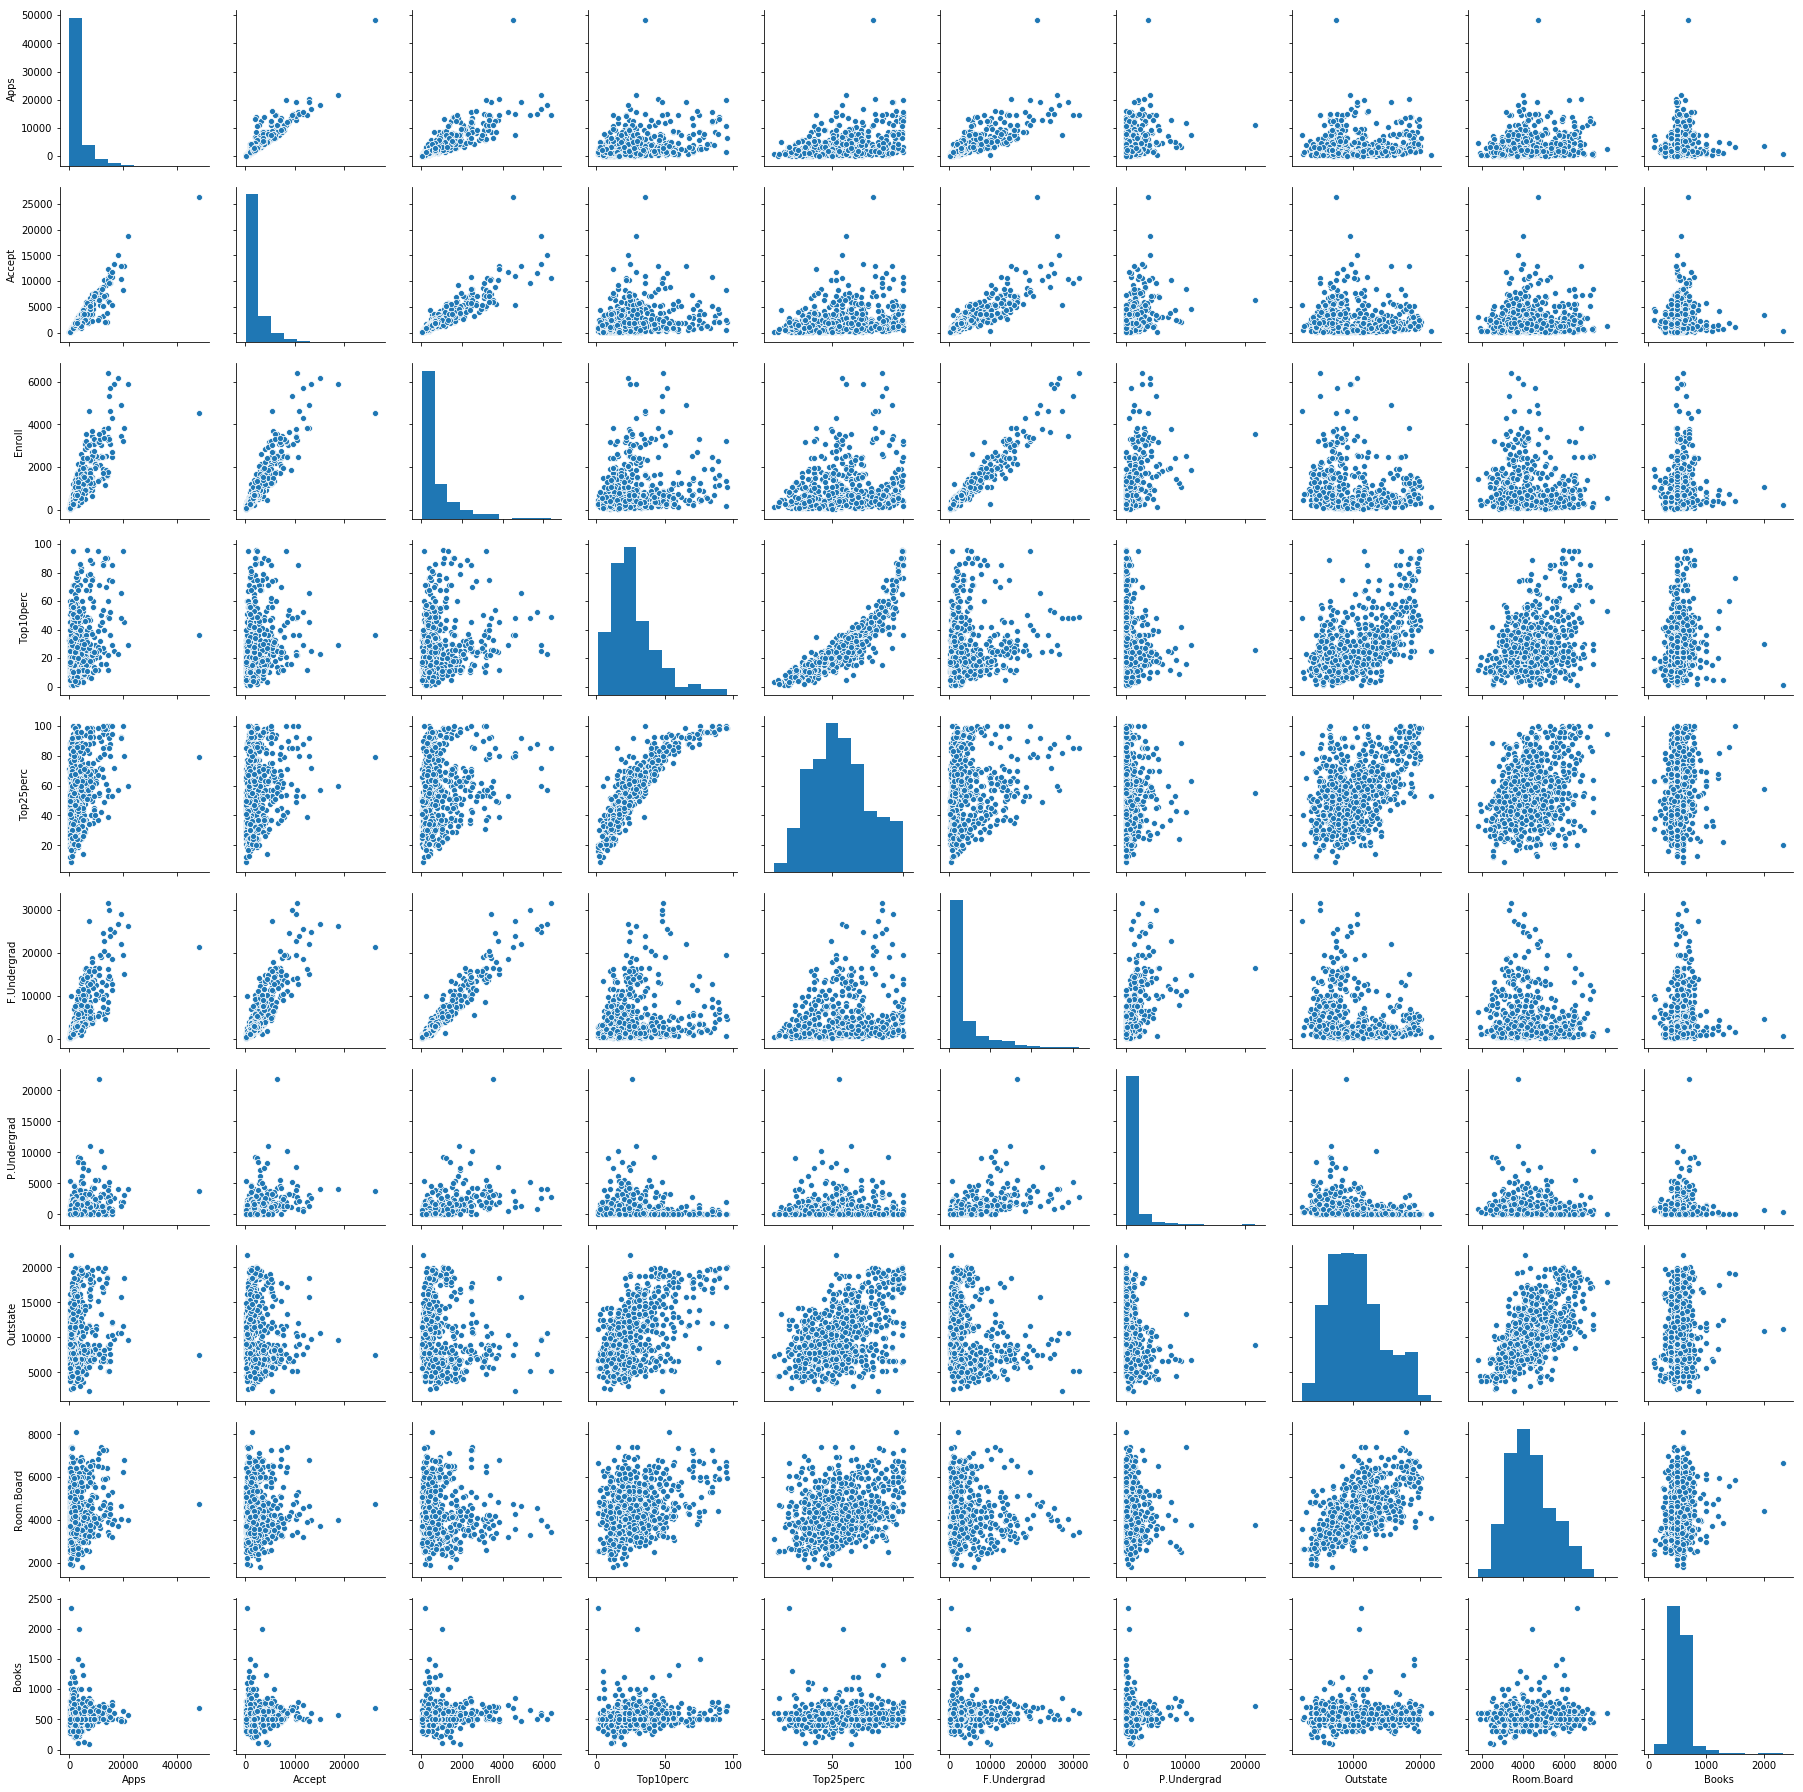

In [4]:
# produce a scatterplot matrix of the first ten columns or variables of the data.
import seaborn as sns

sns.pairplot(college.loc[:, 'Apps':'Books'])

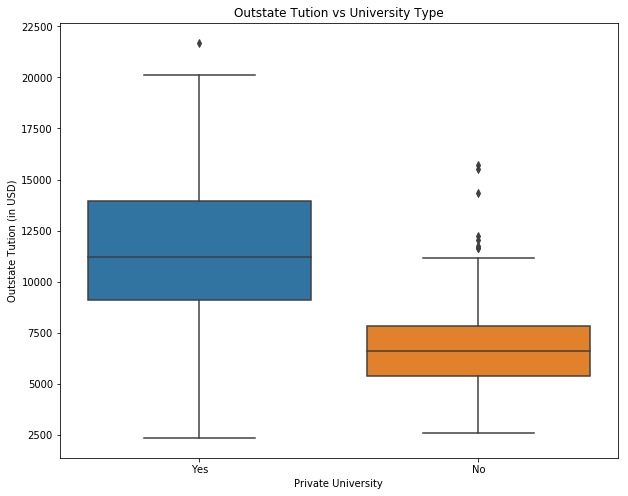

In [5]:
# produce side-by-side boxplots of Outstate versus Private.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.boxplot(x="Private", y="Outstate", data=college)
ax.set_xlabel('Private University')
ax.set_ylabel('Outstate Tution (in USD)')
ax.set_title('Outstate Tution vs University Type')
plt.show()

Number of elite universities are: 78


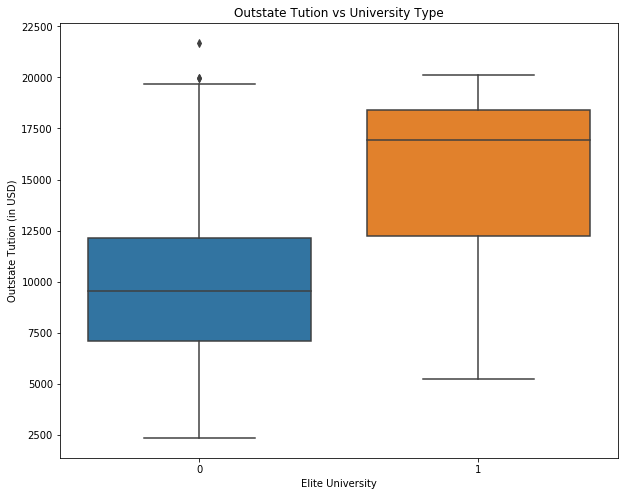

In [6]:
# Create a new qualitative variable, called Elite, by binning the Top10perc variable.
college['Elite'] = 0
college.loc[college['Top10perc'] > 50, 'Elite'] = 1
print("Number of elite universities are: " +str(college['Elite'].sum()))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.boxplot(x="Elite", y="Outstate", data=college)
ax.set_xlabel('Elite University')
ax.set_ylabel('Outstate Tution (in USD)')
ax.set_title('Outstate Tution vs University Type')
plt.show()

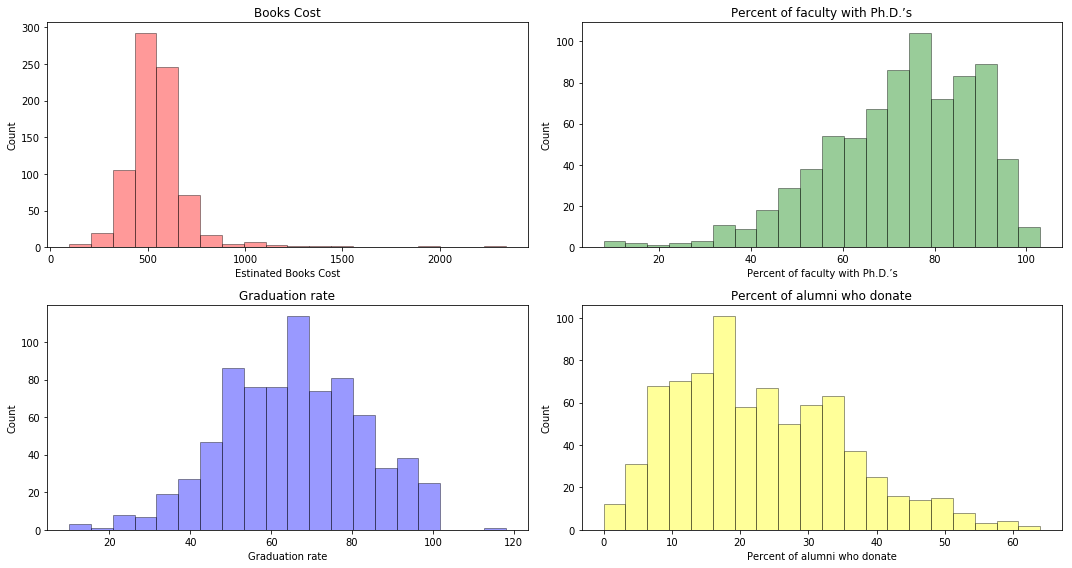

In [7]:
# produce some histograms with differing numbers of bins for a few of the quantitative vari- ables.
college.head()

fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(221)
sns.distplot(college['Books'], bins=20, kde=False, color='r', hist_kws=dict(edgecolor='black', linewidth=1))
ax.set_xlabel('Estinated Books Cost')
ax.set_ylabel('Count')
ax.set_title('Books Cost')

ax = fig.add_subplot(222)
sns.distplot(college['PhD'], bins=20, kde=False, color='green', hist_kws=dict(edgecolor='black', linewidth=1))
ax.set_xlabel('Percent of faculty with Ph.D.’s')
ax.set_ylabel('Count')
ax.set_title('Percent of faculty with Ph.D.’s')

ax = fig.add_subplot(223)
sns.distplot(college['Grad.Rate'], bins=20, kde=False, color='blue', hist_kws=dict(edgecolor='black', linewidth=1))
ax.set_xlabel('Graduation rate')
ax.set_ylabel('Count')
ax.set_title('Graduation rate')

ax = fig.add_subplot(224)
sns.distplot(college['perc.alumni'], bins=20, kde=False, color='yellow', hist_kws=dict(edgecolor='black', linewidth=1))
ax.set_xlabel('Percent of alumni who donate')
ax.set_ylabel('Count')
ax.set_title('Percent of alumni who donate')

plt.tight_layout() #Stop subplots from overlapping
plt.show()

<b>Q9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.</b>

In [8]:
auto = pd.read_csv("data/Auto.csv")
auto.dropna(inplace=True)
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(a) Which of the predictors are quantitative, and which are qualitative?

<b>Sol:</b> Quantitative: displacement, weight, horsepower, acceleration, mpg

Qualitative: cylinders, year, origin

(b) What is the range of each quantitative predictor?

In [9]:
print("Range of displacement: " + str(auto['displacement'].min()) + " - " + str(auto['displacement'].max()))
print("Range of weight: " + str(auto['weight'].min()) + " - " + str(auto['weight'].max()))
print("Range of horsepower: " + str(auto['horsepower'].min()) + " - " + str(auto['horsepower'].max()))
print("Range of acceleration: " + str(auto['acceleration'].min()) + " - " + str(auto['acceleration'].max()))
print("Range of mpg: " + str(auto['mpg'].min()) + " - " + str(auto['mpg'].max()))

Range of displacement: 68.0 - 455.0
Range of weight: 1613 - 5140
Range of horsepower: 46 - 230
Range of acceleration: 8.0 - 24.8
Range of mpg: 9.0 - 46.6


(c) What is the mean and standard deviation of each quantitative predictor?

In [10]:
auto.describe()[['displacement', 'weight', 'horsepower', 'acceleration', 'mpg']].loc[['mean', 'std']]

,displacement,weight,horsepower,acceleration,mpg
mean,194.411990,2977.584184,104.469388,15.541327,23.445918
std,104.644004,849.402560,38.491160,2.758864,7.805007


(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [11]:
temp = auto.drop(auto.index[10:85], axis=0)
temp.describe().loc[['mean', 'std', 'min', 'max']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice.

<b>Sol:</b> Two scatterplots of all the quantitative variables segregated by cylinders and origin is shown below. It is evident that vehicles with higher number of cylinders have higher displacement, weight and horsepower, while lower acceleration and mpg. The relationship of mpg with displacement, weight and horsepower is somewhat predictable. Similarly, the relationships of horsepower, weight and displacement with all the other variables follow a trend. Vehicles are somehow distinguishable by origin as well.

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


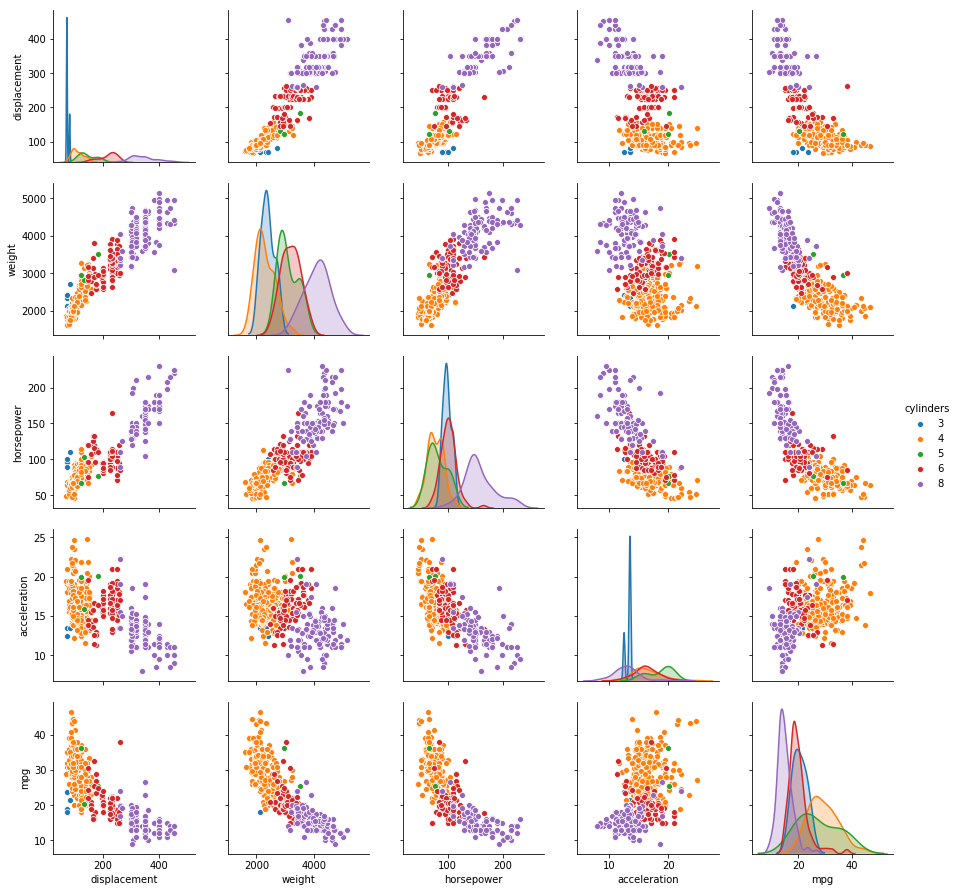

In [12]:
# Scatter plot of quantitative variables
sns.pairplot(auto, vars=['displacement', 'weight', 'horsepower', 'acceleration', 'mpg'], hue='cylinders')

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


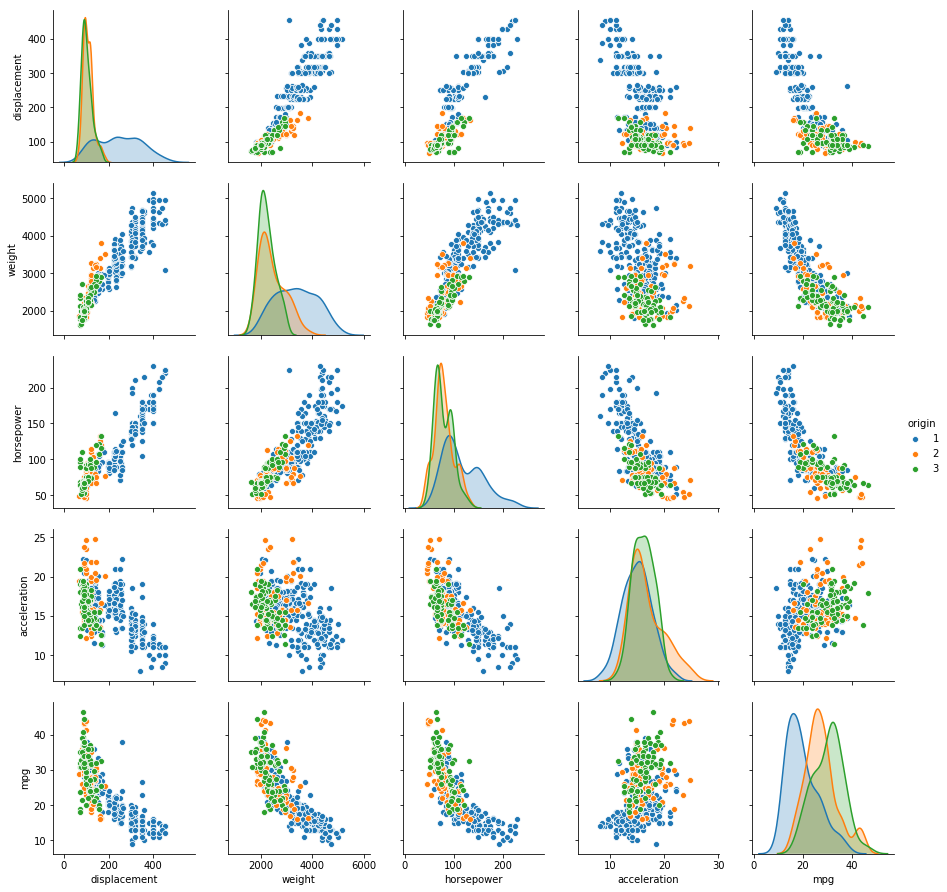

In [13]:
sns.pairplot(auto, vars=['displacement', 'weight', 'horsepower', 'acceleration', 'mpg'], hue='origin')

(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

<b>Sol:</b> From the plot, it is evident that displacement, weight and horsepower can play a significant role in the prediction of mpg. As displacement is highly correlated with weight and horsepower, we can pick any one of them for the prediction. Origin and cylinders can also be used for prediction.

<b>Q10. This exercise involves the Boston housing data set.</b>

(a) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()
print("(Rows, Cols): " +str(boston.data.shape))
print(boston.DESCR)

(Rows, Cols): (506, 13)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teac

(b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

<b>Sol:</b> Pairwise scatterplot of <b>nitric oxides concentration</b> vs <b>weighted distances to five Boston employment centres</b> shows that as distance decreases, the concentration of nitrous oxide increases.

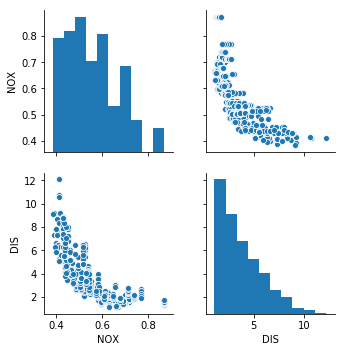

In [30]:
df_boston = pd.DataFrame(boston.data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
                                               'PTRATIO', 'B', 'LSTAT'])

sns.pairplot(df_boston, vars=['NOX', 'DIS'])

(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

<b>Sol:</b> As most of the area has crime rate less than 20%, we will analyze the scatterplot for those areas only.

Text(0.5,1,'Crime Rate Histogram')

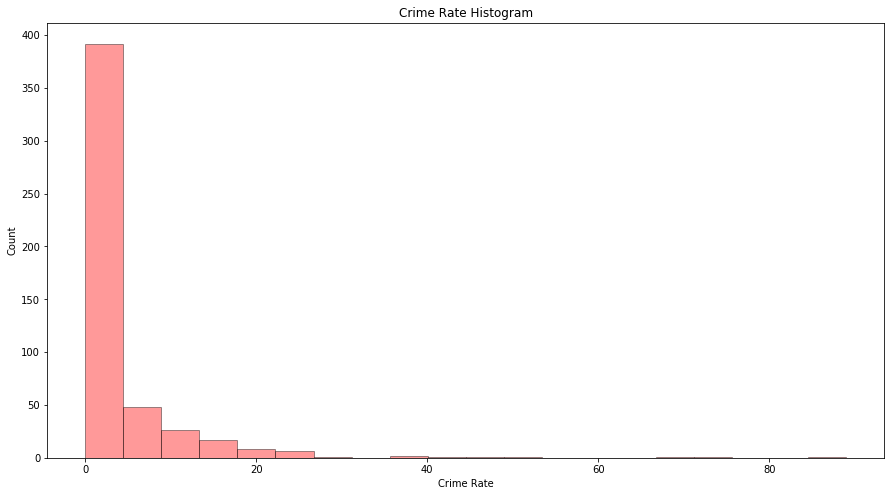

In [16]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(111)
sns.distplot(df_boston['CRIM'], bins=20, kde=False, color='r', hist_kws=dict(edgecolor='black', linewidth=1))
ax.set_xlabel('Crime Rate')
ax.set_ylabel('Count')
ax.set_title('Crime Rate Histogram')

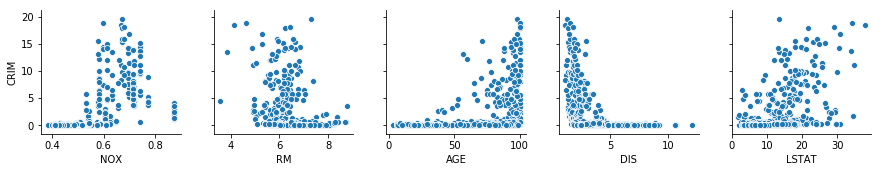

In [17]:
temp = df_boston[df_boston['CRIM'] <= 20]
sns.pairplot(temp, y_vars=['CRIM'], x_vars=['NOX', 'RM', 'AGE', 'DIS', 'LSTAT'])

(d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

In [21]:
print("Count of suburbs with higher crime rate: " + str(df_boston[df_boston['CRIM'] > 20].shape[0]))
print("Count of suburbs with higher tax rate: " + str(df_boston[df_boston['TAX'] > 600].shape[0]))
print("Count of suburbs with higher pupil-teacher ratio: " + str(df_boston[df_boston['PTRATIO'] > 20].shape[0]))

Count of suburbs with higher crime rate: 18
Count of suburbs with higher tax rate: 137
Count of suburbs with higher pupil-teacher ratio: 201


(e) How many of the suburbs in this data set bound the Charles river?

In [26]:
print("Suburbs bound the Charles river: " + str(df_boston[df_boston['CHAS'] == 1].shape[0]))

Suburbs bound the Charles river: 35


(f) What is the median pupil-teacher ratio among the towns in this data set?

In [27]:
print("Median pupil-teacher ratio is: " + str(df_boston['PTRATIO'].median()))

Median pupil-teacher ratio is: 19.05


(h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?

In [34]:
print("Suburbs with average more than 7 rooms per dwelling: " + str(df_boston[df_boston['RM'] > 7].shape[0]))
print("Suburbs with average more than 7 rooms per dwelling: " + str(df_boston[df_boston['RM'] > 8].shape[0]))

Suburbs with average more than 7 rooms per dwelling: 64
Suburbs with average more than 7 rooms per dwelling: 13
